**Context:**

- Market Dynamics: Pasar perumahan memiliki dinamika yang kompleks dengan konsumen yang berupaya mendapatkan nilai terbaik untuk investasi mereka dan pengusaha yang bertujuan menjaga keuntungan dan pertumbuhan bisnis. <br>
- Risks of Overpricing and Underpricing: Praktik overpricing dapat merugikan kepercayaan konsumen, sementara underpricing dapat menghambat pertumbuhan bisnis dan merugikan pengusaha.

**Problem Statement:**

- Consumer Perspective: Konsumen sering kali mengalami ketidakpastian dalam menilai apakah harga properti mencerminkan nilai sebenarnya. Keinginan untuk menghindari pembelian dengan harga yang tidak sesuai dengan nilai properti menjadi kendala utama dalam pengambilan keputusan. <br>
- Business Perspective: Pengusaha perumahan menghadapi tantangan menetapkan harga yang seimbang. Overpricing dapat menghambat penjualan dan merugikan reputasi, sementara underpricing dapat menyebabkan kerugian finansial dan pertumbuhan bisnis yang terbatas.

**Goals:**

- Consumer Empowerment: Memberdayakan konsumen dengan informasi yang akurat dan transparan mengenai faktor-faktor yang mempengaruhi harga properti, sehingga mereka dapat membuat keputusan pembelian yang lebih cerdas. <br>
- Business Sustainability: Membantu pengusaha perumahan menetapkan harga yang seimbang, mengurangi risiko overpricing dan underpricing, serta menciptakan hubungan yang berkelanjutan dengan konsumen.

**Analytics Approach:**

- Model Machine Learning Regresi: Membangun model machine learning regresi untuk memprediksi harga properti berdasarkan faktor-faktor seperti lokasi geografis, usia perumahan, jumlah kamar, dan lainnya. <br>
- Feature Importance Analysis: Melakukan analisis terhadap faktor-faktor yang memiliki dampak signifikan terhadap harga properti, sehingga konsumen dapat memahami dengan lebih baik faktor-faktor yang mempengaruhi harga properti. <br>
- Pricing Strategy Optimization: Menggunakan model untuk membantu pengusaha mengoptimalkan strategi penetapan harga, memastikan bahwa harga yang ditawarkan mencerminkan nilai sebenarnya dari properti tanpa mengalami overpricing atau underpricing.

Penjelasan Feature:
- Longitude: Merupakan koordinat geografis yang menunjukkan lokasi timur atau barat suatu titik pada peta bumi.
- Latitude: Merupakan koordinat geografis yang menunjukkan lokasi utara atau selatan suatu titik pada peta bumi.
- Housing Median Age: Merupakan usia rata-rata perumahan di daerah tersebut, diukur dalam tahun.
- Total Rooms: Jumlah total kamar di semua rumah di daerah tersebut.
- Total Bedrooms: Jumlah total kamar tidur di semua rumah di daerah tersebut.
- Population: Jumlah total penduduk di daerah tersebut.
- Households: Jumlah kepala keluarga atau rumah tangga di daerah tersebut.
- Median Income: Pendapatan rata-rata rumah tangga di daerah tersebut.
- Ocean Proximity: Informasi tentang seberapa dekat suatu rumah dengan pantai atau lautan, dapat berupa kategori seperti "dekat laut", "pantai", dll.
- Median House Value **(FItur Target)**: Nilai median rumah di daerah tersebut, yang merupakan nilai tengah dari harga rumah di daerah tersebut.

In [1]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
# See the general info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


In [57]:
# Check for duplicated rows
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


In [53]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-120.44, -122.45]"
1,latitude,float64,0,0.00,836,"[39.26, 37.89]"
2,housing_median_age,float64,0,0.00,52,"[21.0, 24.0]"
3,total_rooms,float64,0,0.00,5227,"[1297.0, 3707.0]"
4,total_bedrooms,float64,137,0.95,1748,"[485.0, 213.0]"
5,population,float64,0,0.00,3498,"[3223.0, 3571.0]"
6,households,float64,0,0.00,1649,"[979.0, 2359.0]"
7,median_income,float64,0,0.00,9797,"[4.0878, 1.8235]"
8,ocean_proximity,object,0,0.00,5,"[NEAR BAY, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[409600.0, 251000.0]"


In [54]:
#Mencari Nilai Unik dari Kolom ocean_proximity
df['ocean_proximity'].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
# Membuat duplikasi sebagai back-up
df_model = df.copy()

**Multivariate**

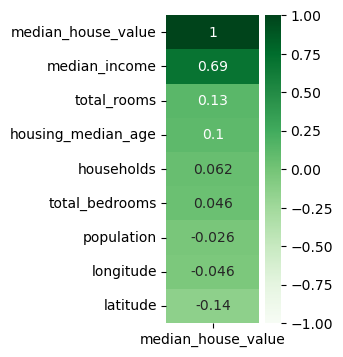

In [9]:
df_corr=df_model[['median_house_value','longitude','latitude','housing_median_age',
                  'total_rooms','total_bedrooms','population','households','median_income']]
# Correlating features with target
plt.figure(figsize=(1.5, 4))
heatmap = sns.heatmap(df_corr.corr()[['median_house_value']].sort_values(by='median_house_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')

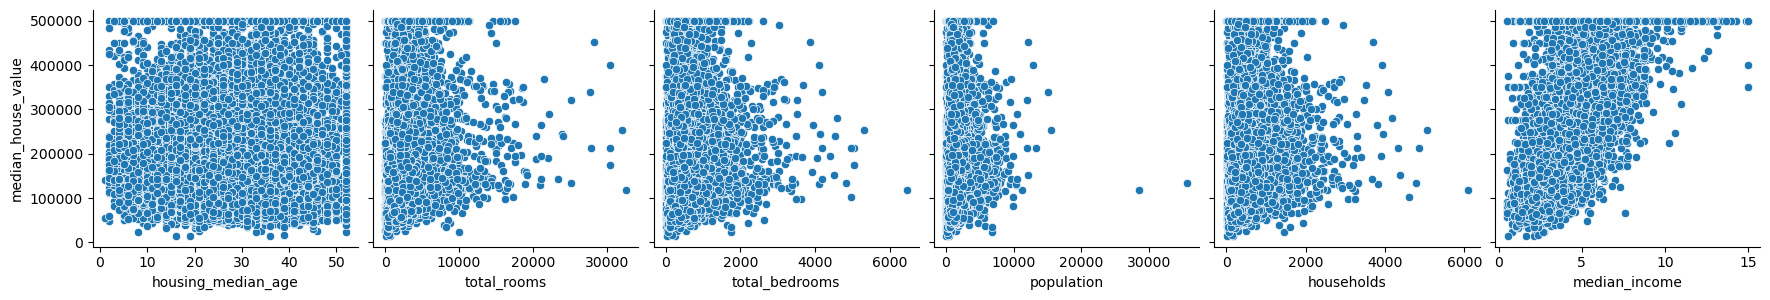

In [10]:
# Pairplot variable target with strong correlation variables target -with
sns.pairplot(df_model, x_vars=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'], y_vars=['median_house_value'], height=3, aspect=1)

dari hasil pengecekan melalui pairplot dan heatmap, jelas bahwa hanya median_income yang berkorelasi kuat dengan median_house_value

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

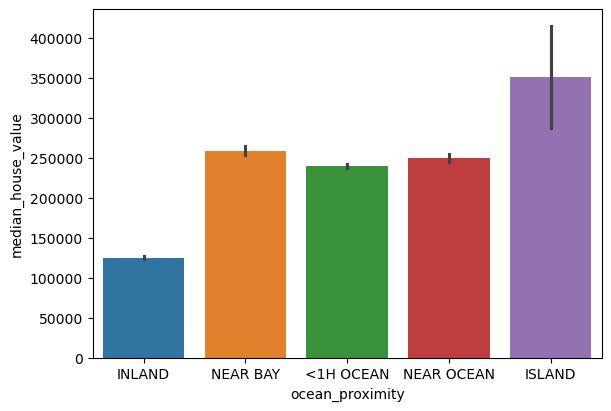

In [11]:
fig = plt.figure(figsize=(6,4), constrained_layout=True)
sns.barplot(data=df_model, x=df_model['ocean_proximity'], y=df_model['median_house_value'], hue=df_model['ocean_proximity'])

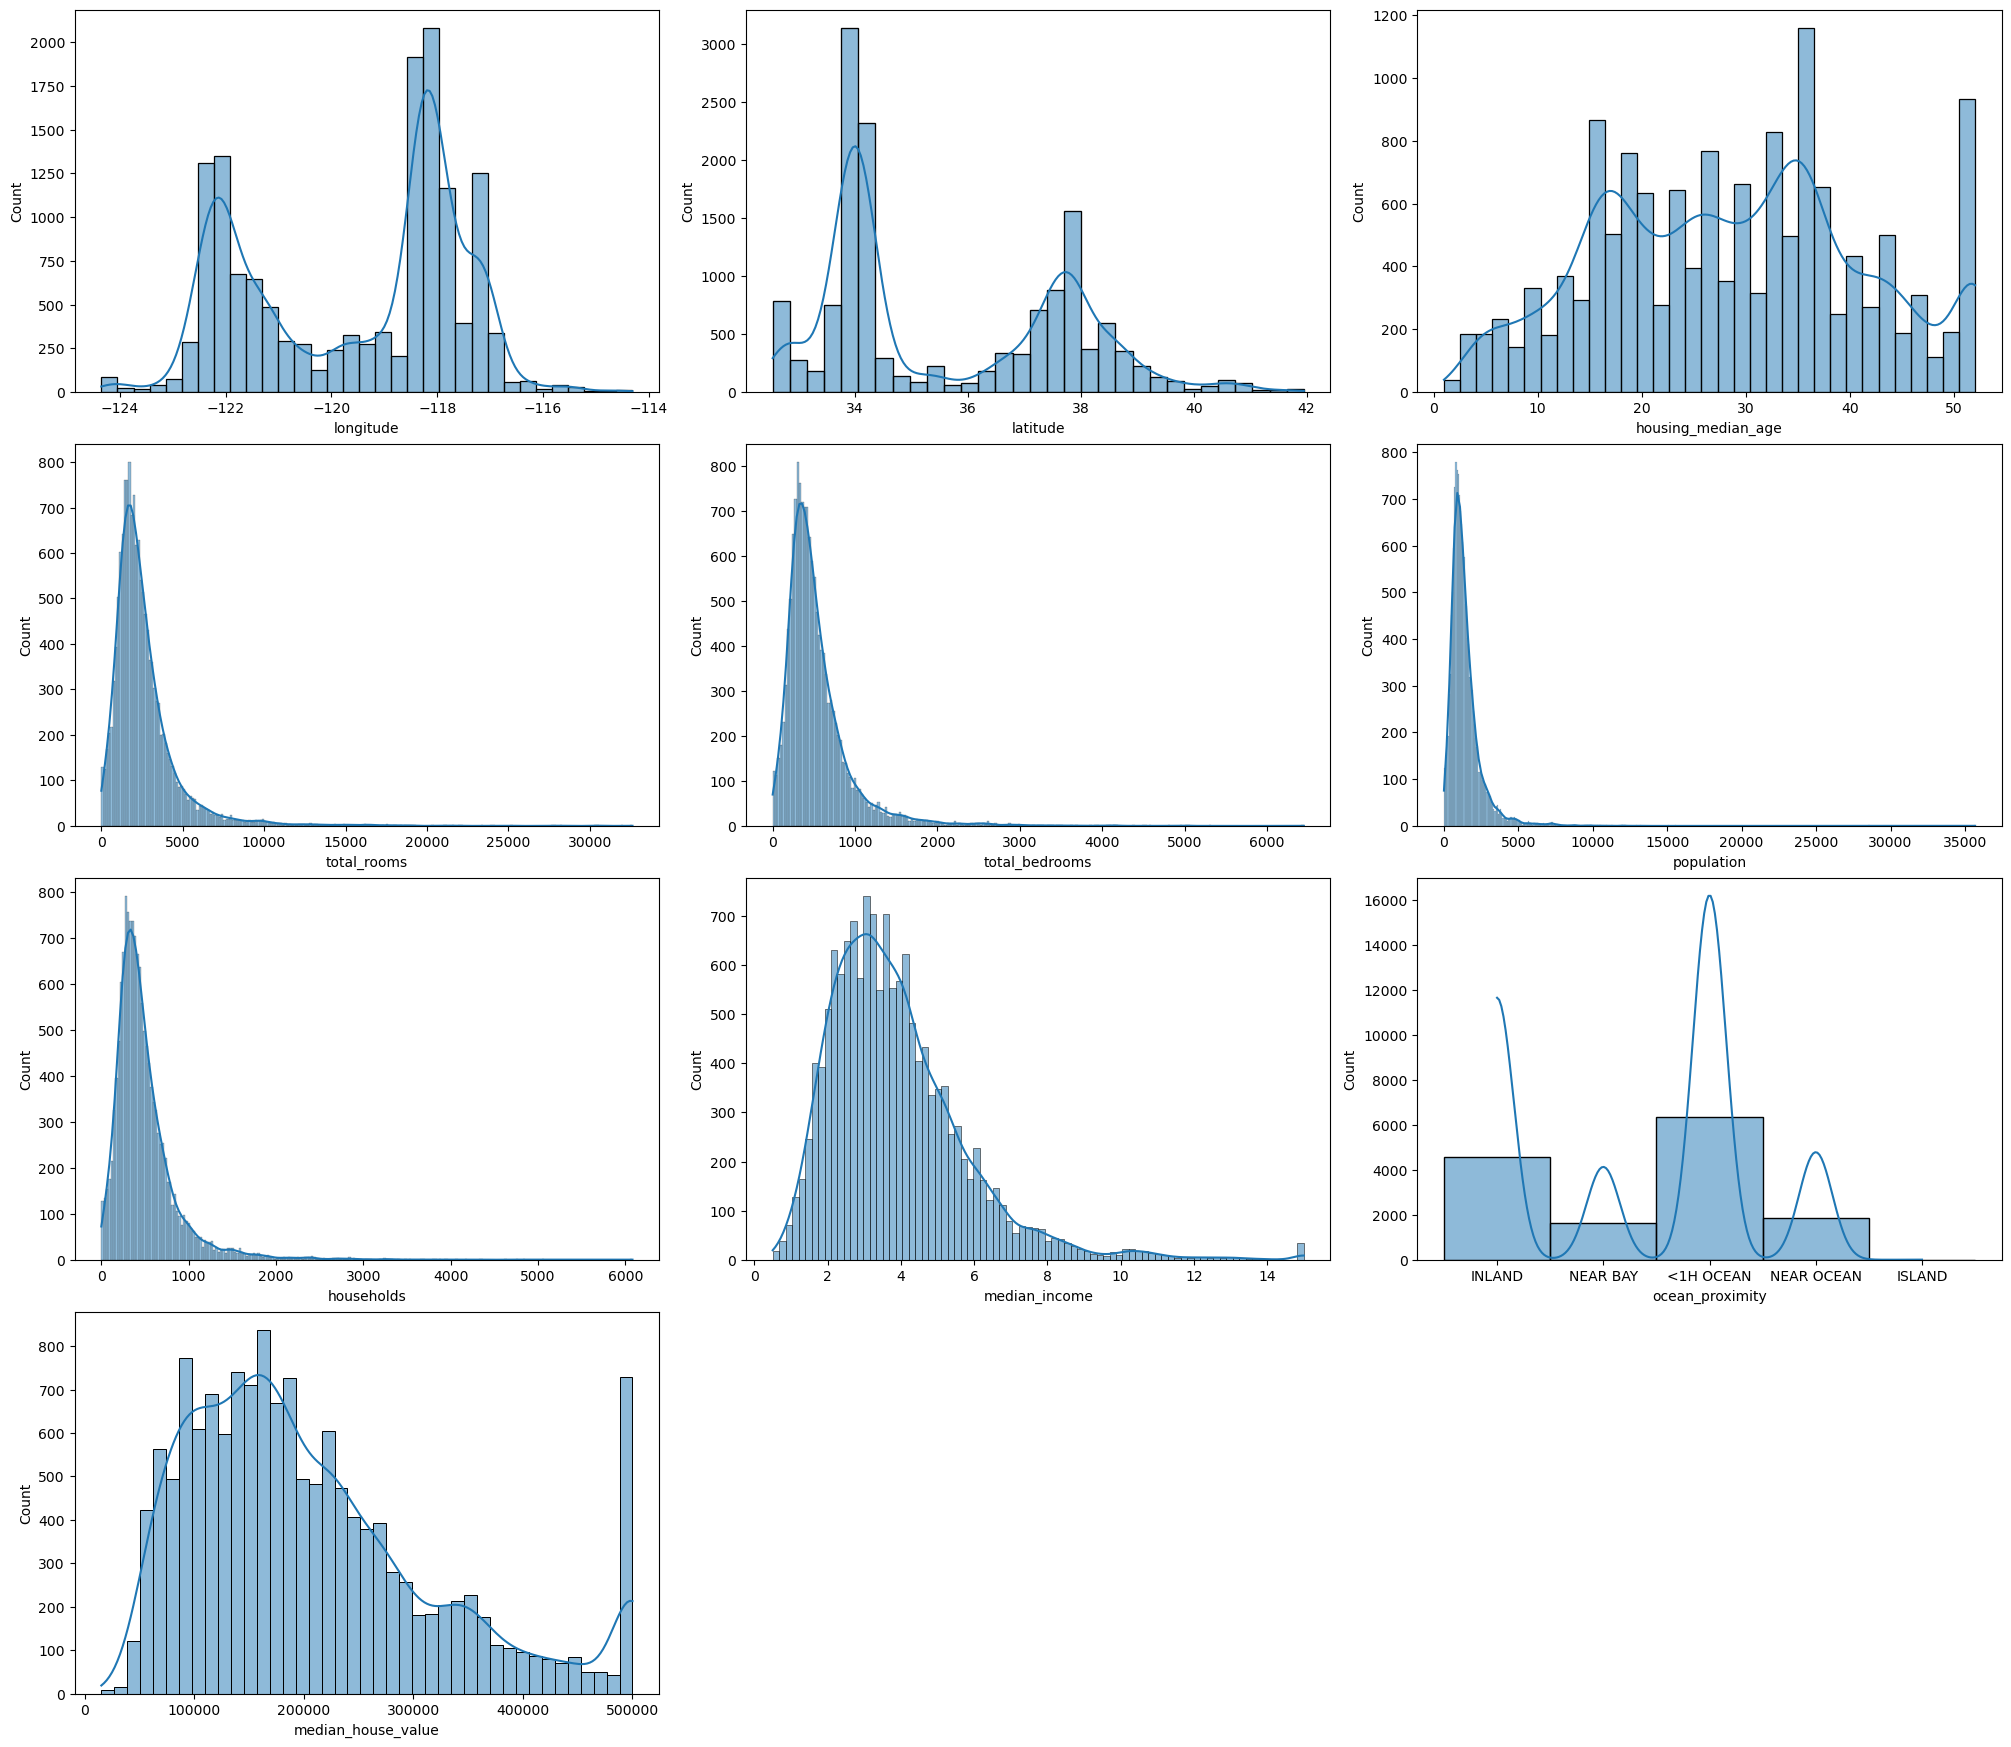

In [12]:
# Graph each variable's distribution
fig = plt.figure(figsize=(20, 25), constrained_layout=True)
for i in range(len(df_model.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(data=df_model, x=df_model[df_model.columns[i]], kde=True)

Text(0.5, 1.0, 'Ocean Proximity Group Location')

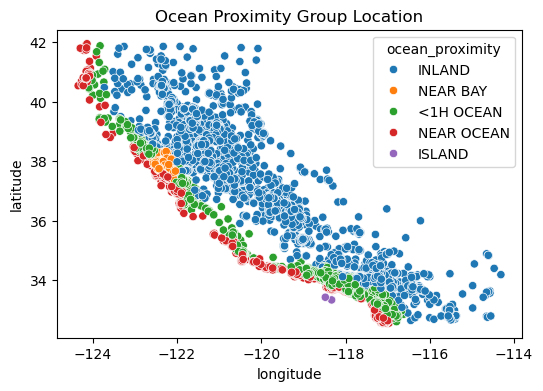

In [13]:
# Plot lokasi 'neighbourhood_group'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_model['longitude'], y=df_model['latitude'], hue=df['ocean_proximity']).set_title('Ocean Proximity Group Location')

**Missing Value**

In [14]:
#menemukan Data dengan terdapat nilai kosong
def nullrow(x): 
    return x[x.isnull().any(axis=1)]
nullrow(df_model)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


<Axes: xlabel='total_bedrooms', ylabel='Density'>

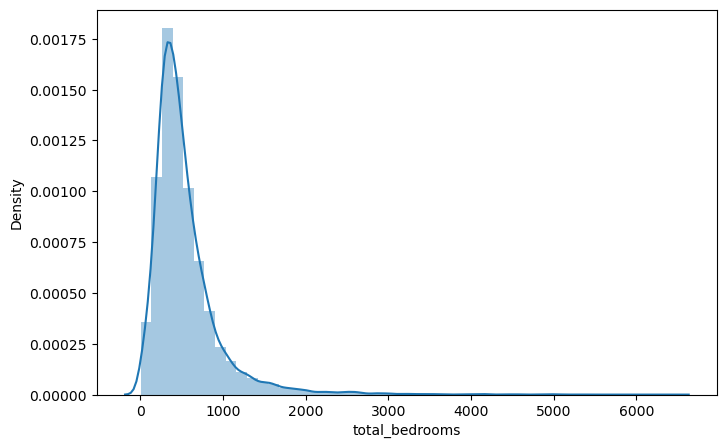

In [15]:
#melihat distribusi data total_bedrooms
plt.figure(figsize=(8,5))
sns.distplot(df_model['total_bedrooms'])

data 'total_bedrooms' jika dilihat plotnya tidak berdistribusi normal, oleh sebab itu imputation dengan median akan dilakukan untuk mengisi nilai n/a daripada membuang datanya / imputation dengan mean

In [16]:
df_model["total_bedrooms"].median()

435.0

In [17]:
df_model["total_bedrooms"].fillna(df_model["total_bedrooms"].median(), inplace=True)

**Outliers**

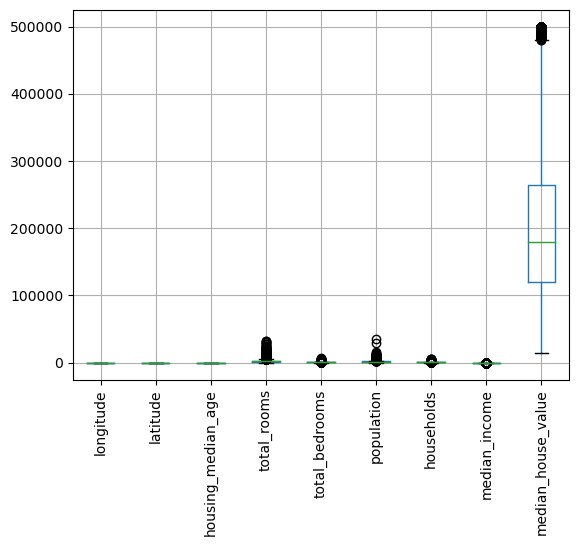

In [18]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terdapat sejumlah outliers yang signifikan pada beberapa fitur dalam dataset ini. Dalam proyek ini, saya berencana untuk membersihkan dataset dari outliers dengan menerapkan rekayasa data pada fitur-fitur tersebut. Pendekatan ini melibatkan kombinasi antara metode IQR dan pengetahuan domain untuk memastikan data yang dihasilkan lebih bersih. Model yang dikembangkan kemudian akan terbatas pada kemampuannya untuk memprediksi listing baru hanya berdasarkan dataset yang telah dibersihkan ini. Oleh karena itu, prediksi di luar rentang data yang telah ditentukan dapat mengakibatkan bias pada hasil prediksi model.

In [19]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    print(f'IQR: {iqr}')

    limit_bawah = q1 - iqr*1.5
    limit_atas = q3 + iqr*1.5
    outliers = data[(data < limit_bawah) | (data > limit_atas)]
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}') 
    print(f"Jumlah outlier: {len(outliers)}")

In [20]:
list_outlier = ['median_house_value', 'total_rooms', 'total_bedrooms',
               'population', 'households', 'median_income']
for i in list_outlier:
    print('Untuk Fitur:',i)
    find_anomalies(df_model[i])
    print('=======================')

Untuk Fitur: median_house_value
IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0
Jumlah outlier: 757
Untuk Fitur: total_rooms
IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5
Jumlah outlier: 900
Untuk Fitur: total_bedrooms
IQR: 349.0
limit_bawah: -227.5
limit_atas: 1168.5
Jumlah outlier: 888
Untuk Fitur: population
IQR: 940.0
limit_bawah: -626.0
limit_atas: 3134.0
Jumlah outlier: 827
Untuk Fitur: households
IQR: 325.0
limit_bawah: -208.5
limit_atas: 1091.5
Jumlah outlier: 842
Untuk Fitur: median_income
IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001
Jumlah outlier: 482


Setelah melakukan pengecekan secara menyeluruh, kita akan fokus pada sebaran data yang mengandung outlier dengan melihat boxplot dan distribusi plotnya sehingga data akan dibersihkan sesuai analisa yang tepat

**Handling Outlier: 'median_house_value'**

<Axes: ylabel='median_house_value'>

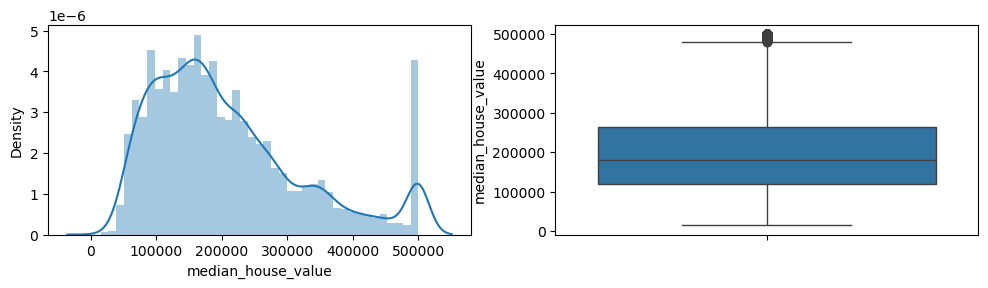

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df_model['median_house_value'])
plt.subplot(2,2,2)
sns.boxplot(df_model['median_house_value'])

Distribusi dataset ini menunjukkan adanya skewness, di mana ekor distribusi cenderung memanjang di sebelah kanan (positif skewness). Sebanyak 757 data memiliki nilai rumah yang melebihi USD 480350 (batas atas berdasarkan metode IQR). Oleh karena itu, data dengan nilai median_house_value (sebagai nilai tengah dari harga di daerah tersebut) yang melebihi USD 480350 akan diabaikan dalam pemodelan. Hal ini diharapkan dapat mengurangi skewness dataset, meskipun juga menjadi batasan yang perlu diperhatikan dalam pembangunan model.

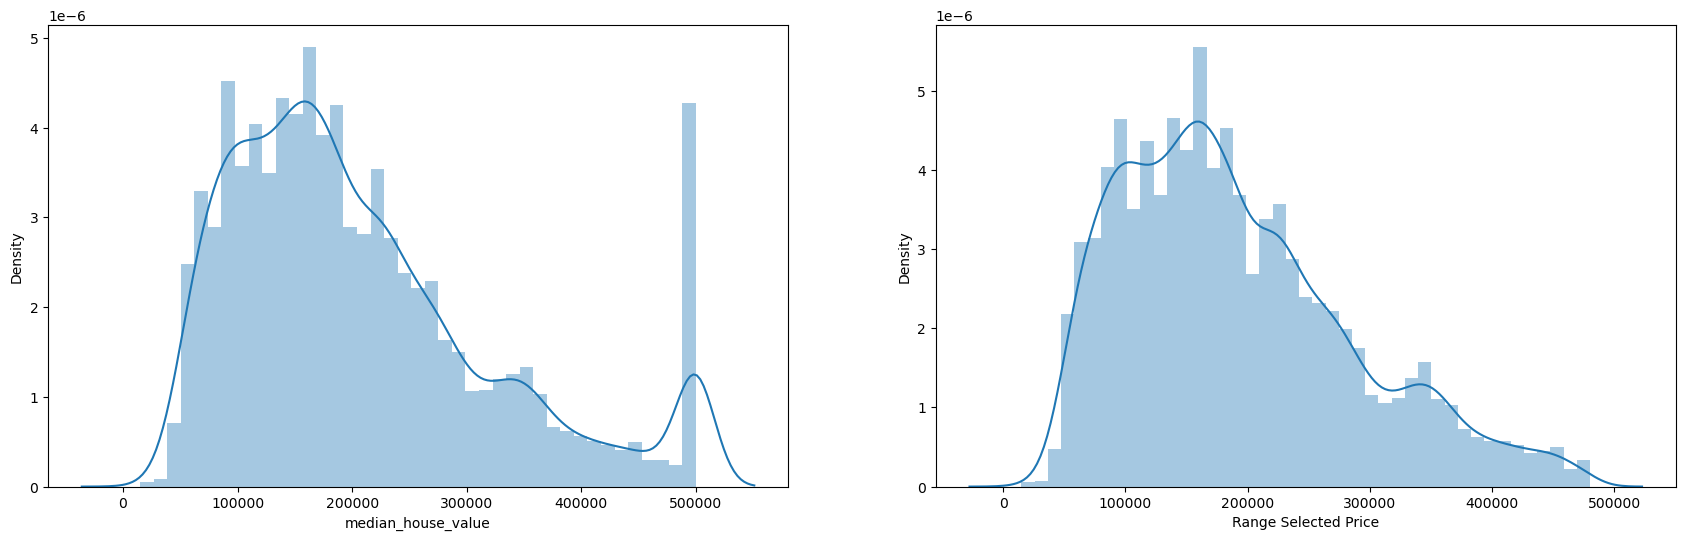

In [22]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_house_value'] <= 480350.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected Price');

**Handling Outlier: 'total_rooms'**

<Axes: ylabel='total_rooms'>

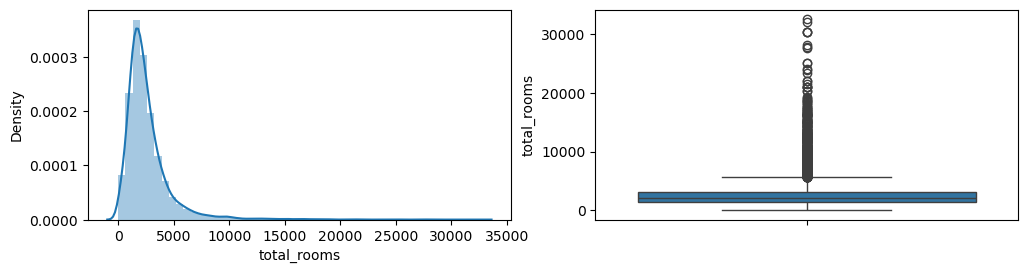

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df_model['total_rooms'])
plt.subplot(2,2,2)
sns.boxplot(df_model['total_rooms'])

Distribusi pada fitur total_rooms menunjukkan skewness dengan ekor distribusi yang lebih panjang di sebelah kanan (positif skewness). Sebanyak 227 data memiliki total_rooms melebihi nilai 5693.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data dengan jumlah total_rooms di atas nilai tersebut akan dihapus dari dataset sebelum pemodelan. Tindakan ini diharapkan dapat mengurangi skewness pada distribusi total_rooms, meskipun harus diakui bahwa hal ini juga menjadi batasan yang perlu diperhatikan dalam pengembangan model.

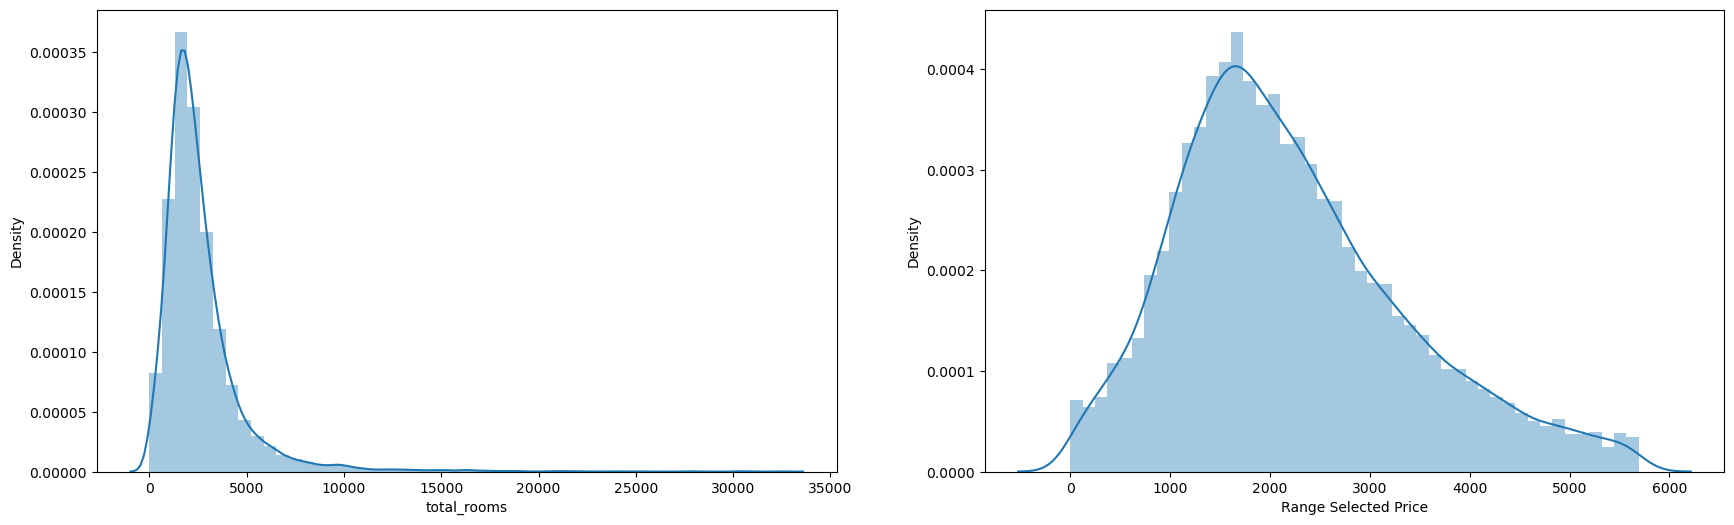

In [24]:
# Melakukan filtering pada data
df_model = df_model[(df_model['total_rooms'] <= 5693.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('total_rooms')
axes[1].set_xlabel('Range Selected Price');

**Handling Outlier: 'total_bedrooms'**

<Axes: ylabel='total_bedrooms'>

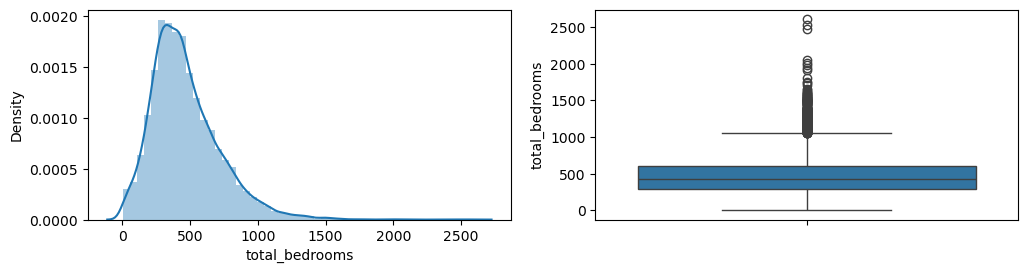

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df_model['total_bedrooms'])
plt.subplot(2,2,2)
sns.boxplot(df_model['total_bedrooms'])

Terlihat adanya skewness pada distribusi total_rooms, dengan ekor distribusi yang lebih panjang di sebelah kanan (positif skewness). Sejumlah 181 data menunjukkan total_rooms yang melebihi nilai 1014.5 (batas atas berdasarkan metode IQR). Sebagai upaya untuk mengurangi skewness, data dengan total_rooms di atas nilai tersebut akan dieliminasi dari dataset sebelum dilakukan pemodelan. Meskipun langkah ini diharapkan dapat meratakan distribusi total_rooms, penting untuk diingat bahwa hal ini juga memunculkan batasan dalam pengembangan model.

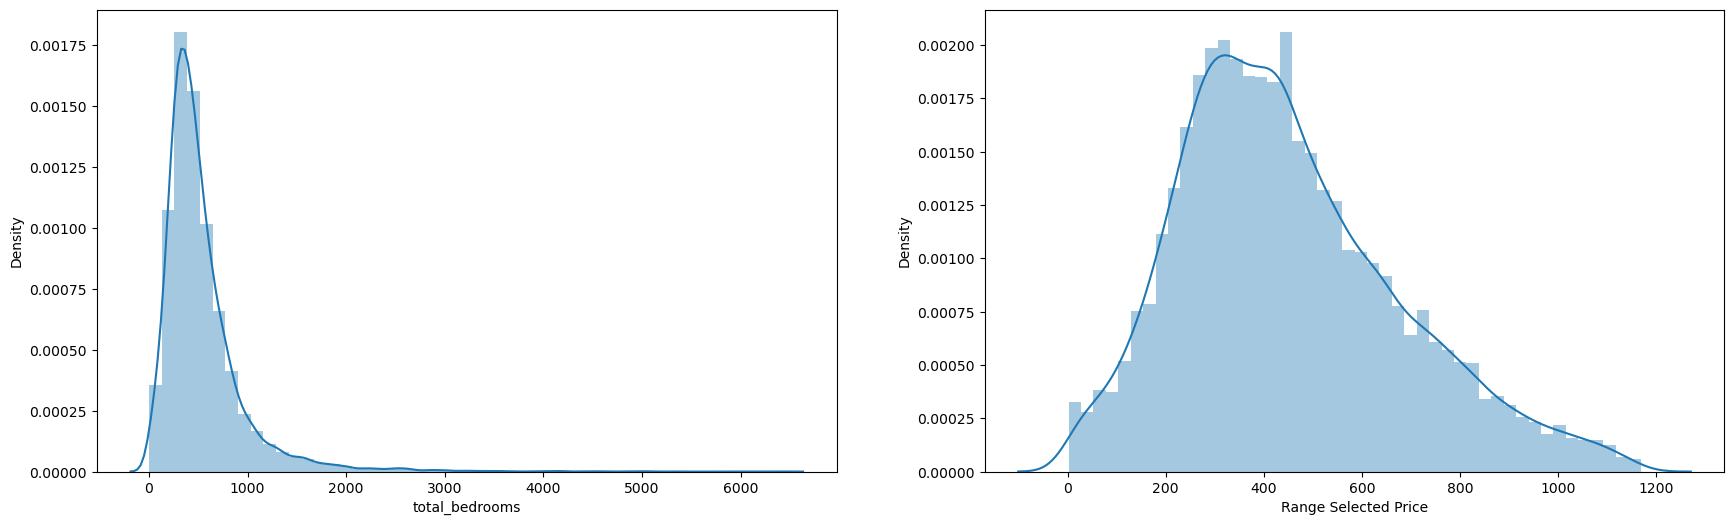

In [26]:
# Melakukan filtering pada data
df_model = df_model[(df_model['total_bedrooms'] <= 1168.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('total_bedrooms')
axes[1].set_xlabel('Range Selected Price');

**Handling Outlier: 'population'**

<Axes: ylabel='population'>

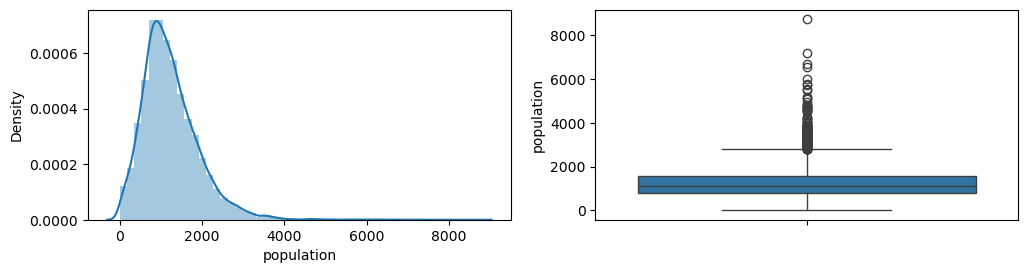

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df_model['population'])
plt.subplot(2,2,2)
sns.boxplot(df_model['population'])

Distribusi pada fitur population menunjukkan adanya skewness, dengan ekor distribusi yang lebih panjang di sebelah kanan (positif skewness). Terdapat 205 data yang menonjol sebagai outliers, dengan nilai population melewati batas atas sebesar 2754.5 berdasarkan metode IQR. Untuk menanggulangi hal ini, data dengan nilai population di atas batas tersebut akan dihapus sebelum dilakukan proses pemodelan. Meskipun diharapkan dapat memperbaiki skewness distribusi population, perlu diingat bahwa langkah ini juga membawa konsekuensi batasan yang perlu diperhatikan dalam pengembangan model.

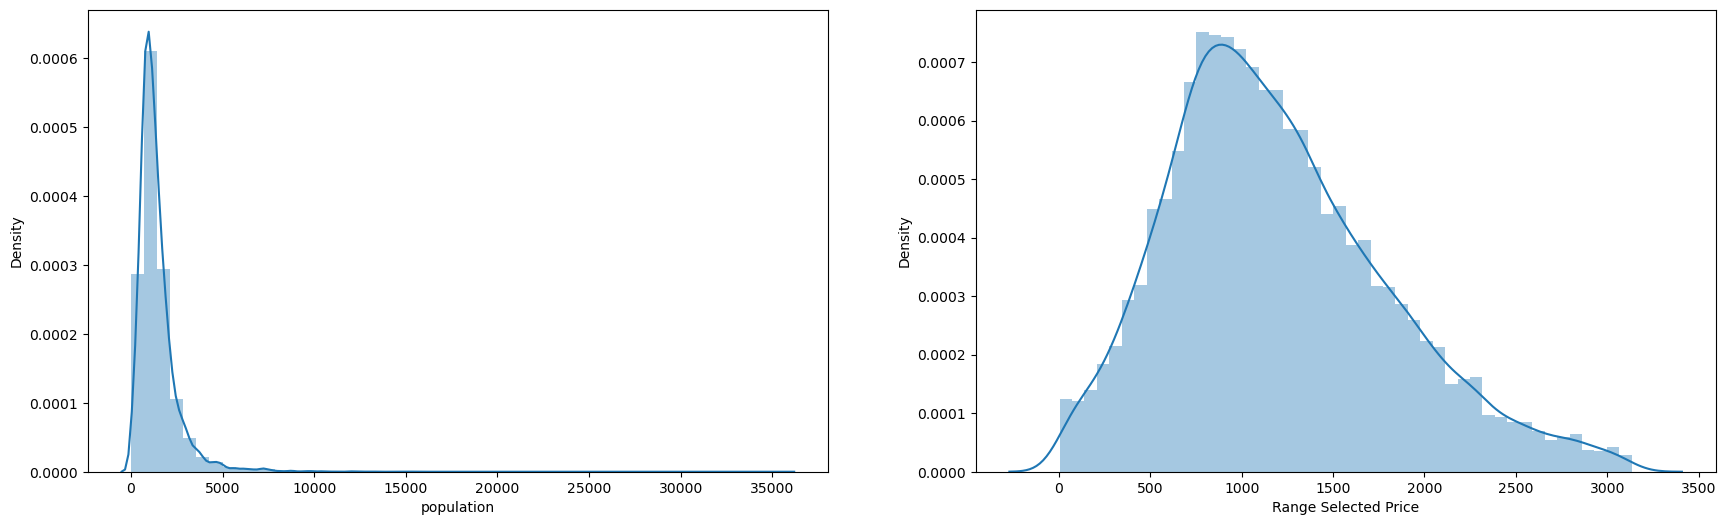

In [28]:
# Melakukan filtering pada data
df_model = df_model[(df_model['population'] <= 3134.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['population'], ax=axes[1])
axes[0].set_xlabel('population')
axes[1].set_xlabel('Range Selected Price');

**Handling Outlier: 'households'**

<Axes: ylabel='population'>

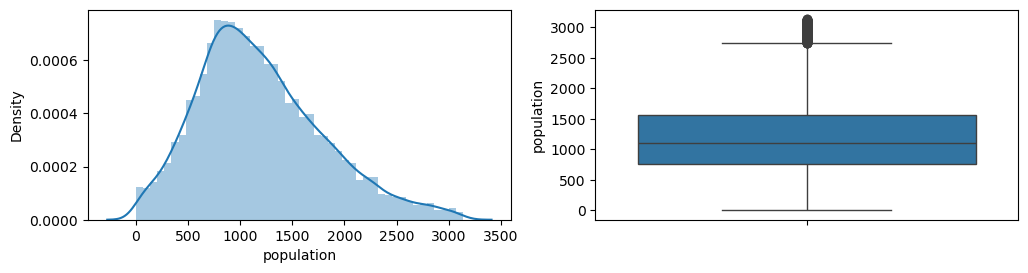

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df_model['population'])
plt.subplot(2,2,2)
sns.boxplot(df_model['population'])

Distribusi pada fitur households menunjukkan kecenderungan skewness, di mana ekor distribusi lebih panjang di sisi kanan (positif skewness). Sebanyak 168 data diidentifikasi sebagai outlier, dengan nilai households melewati batas atas sebesar 950.0 berdasarkan metode IQR. Dalam rangka menanggulangi hal ini, data yang memiliki nilai households di atas batas tersebut akan dihapus sebelum proses pemodelan. Meskipun diharapkan dapat meratakan skewness distribusi households, penting untuk diingat bahwa tindakan ini juga akan memunculkan batasan tertentu dalam pengembangan model.

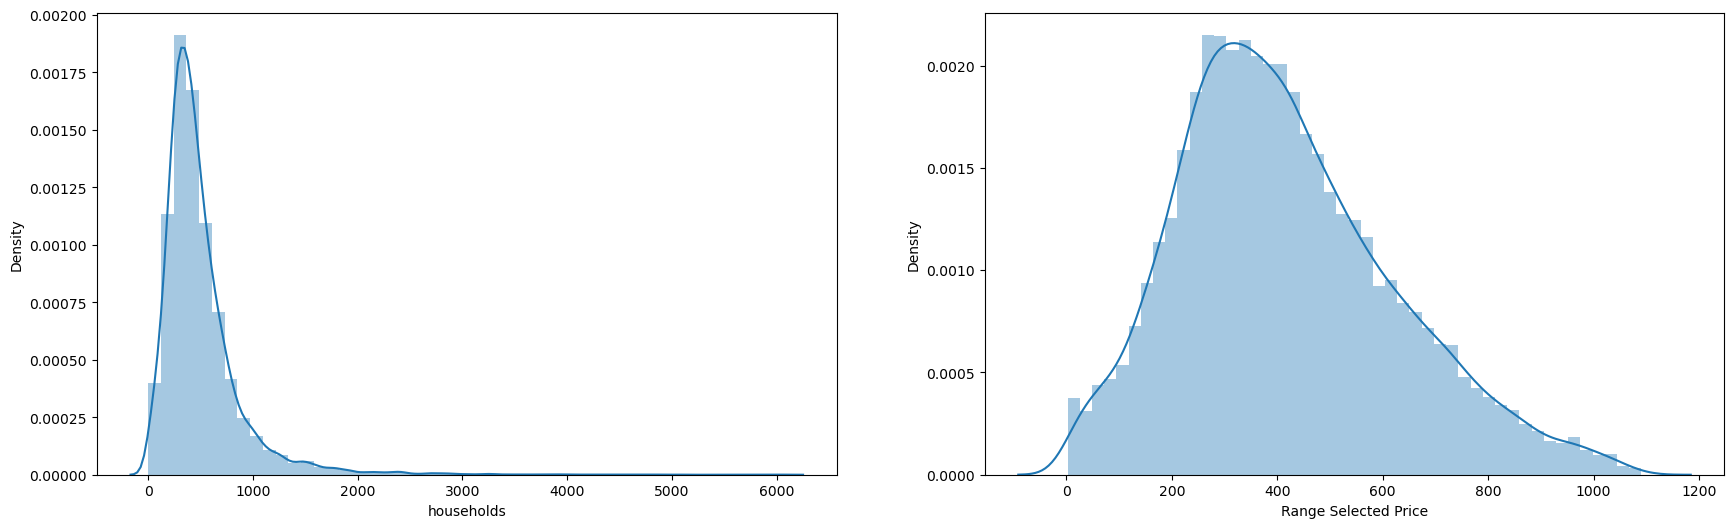

In [30]:
# Melakukan filtering pada data
df_model = df_model[(df_model['households'] <= 1091.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('households')
axes[1].set_xlabel('Range Selected Price');

**Handling Outlier: 'median_income'**

<Axes: ylabel='median_income'>

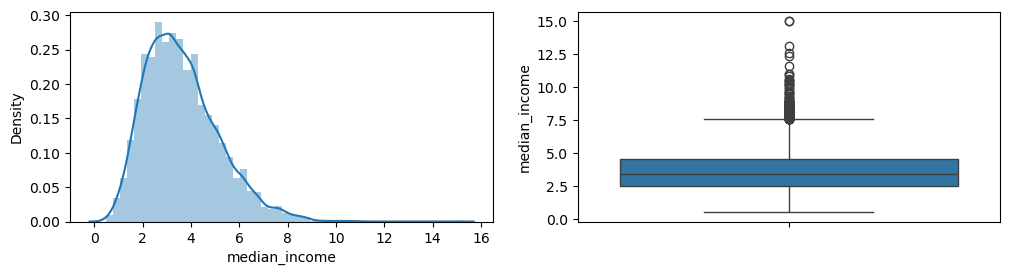

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df_model['median_income'])
plt.subplot(2,2,2)
sns.boxplot(df_model['median_income'])

Distribusi pada fitur median_income menunjukkan kecenderungan skewness, dengan ekor distribusi yang lebih panjang di sisi kanan (positif skewness). Ada 127 data yang diidentifikasi sebagai outlier, dengan nilai median_income melampaui batas atas sebesar 7.984350000000001 berdasarkan metode IQR. Sebagai langkah untuk menanggulangi hal ini, data dengan nilai median_income di atas batas tersebut akan dihapus sebelum pemodelan dilakukan. Meskipun diharapkan dapat mengurangi skewness pada distribusi median_income, perlu dicatat bahwa tindakan ini juga akan membawa batasan tertentu dalam pengembangan model.

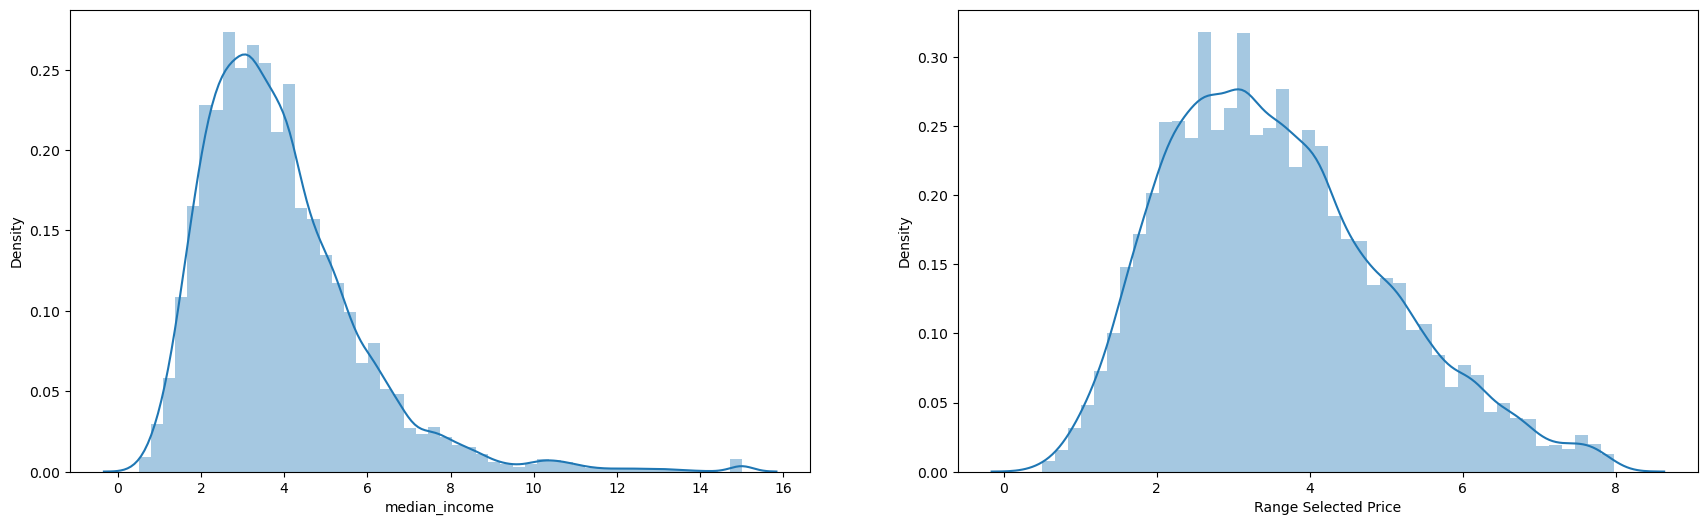

In [32]:
# Melakukan filtering pada data
df_model = df_model[(df_model['median_income'] <= 7.984350000000001)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_model['median_income'], ax=axes[1])
axes[0].set_xlabel('median_income')
axes[1].set_xlabel('Range Selected Price');

# Modeling

In [33]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Terdapat tiga metode encoding yang relevan, yaitu binary encoding, ordinal encoding, dan one-hot encoding. binary encoding dan one-hot encoding dapat diterapkan, tetapi untuk ordinal encoding, kita tidak bisa melakukan karena kita tidak mengetahui urutan yang benar dari kategori unik 'INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', dan 'ISLAND'. Akibat kategorinya tidak banyak, maka one-hot encoding yang akan dilakukan.

In [34]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough') #dropfirst dilakukan karena kita akan menggunakan model regresi yang terlalu peka terhadap banyaknya fitur

**Data Splitting**

In [35]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

**Train and Test Splitting**

In [36]:
# Splitting data training dan test dengan proporsi 80:20
X_trainval, X_test, y_trainval, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=2020)

**Select a Benchmark Model**

In [37]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_trainval, 
        y_trainval, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_trainval, 
        y_trainval, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_trainval, 
        y_trainval, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-56122.24480559 -59038.22066903 -59360.15693203 -60853.2794606
 -55668.71579932] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-39567.59912437 -41868.06998309 -42254.02884206 -42432.41317598
 -40343.14858301] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.23556287 -0.24206882 -0.24749483 -0.24918865 -0.23978284] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-54317.99152417 -54409.33214535 -54926.7982696  -58315.95324487
 -50835.9803335 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37148.58933396 -37399.15464013 -38789.56460958 -38706.63727228
 -35236.54122877] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [38]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
hasil=pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})
hasil

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58208.523533,1990.606591,-41293.051942,1134.175488,-0.242820,0.004997
1,KNN Regressor,-54561.211103,2374.502466,-37456.097417,1293.539180,-0.214570,0.006514
2,DecisionTree Regressor,-61924.002785,1466.941468,-41521.356761,1126.430774,-0.244888,0.004087
3,RandomForest Regressor,-45789.996630,2239.360937,-30078.530207,862.722671,-0.173340,0.004824
4,XGBoost Regressor,-44251.752395,1882.763010,-29287.318150,693.206861,-0.169508,0.003011


In [39]:
hasil.loc[hasil['Mean_RMSE'] == hasil['Mean_RMSE'].max(), 'Model'].iloc[0]

'XGBoost Regressor'

In [40]:
hasil.loc[hasil['Mean_MAE'] == hasil['Mean_MAE'].max(), 'Model'].iloc[0]

'XGBoost Regressor'

In [41]:
hasil.loc[hasil['Mean_MAPE'] == hasil['Mean_MAPE'].max(), 'Model'].iloc[0]

'XGBoost Regressor'

XGBoost Regressor secara konsisten mengungguli model-model lainnya. Dengan RMSE, MAE, dan MAPE yang lebih rendah, XGBoost Regressor menonjol sebagai pilihan terbaik untuk memodelkan dan memprediksi data harga perumahan. Hasil yang konsisten dari berbagai metrik evaluasi menunjukkan bahwa XGBoost Regressor adalah model yang handal dan sesuai untuk digunakan dalam mengatasi tantangan penentuan harga di industri perumahan.

In [42]:
XGB = XGBRegressor(random_state=1)

bestmodel = Pipeline([('preprocessing', transformer),
        ('scaler', scaler),
        ('model', XGB)
        ])
bestmodel.fit(X_trainval, y_trainval)
y_pred = bestmodel.predict(X_test)

score_before_tuning = pd.DataFrame({'RMSE': (np.sqrt(mean_squared_error(y_test, y_pred))),
                                    'MAE': (mean_absolute_error(y_test, y_pred)), 
                                    'MAPE': (mean_absolute_percentage_error(y_test, y_pred))}, index=['XGB_Before'])
score_before_tuning

,RMSE,MAE,MAPE
XGB_Before,44479.601131,30071.419248,0.17635


**Hyper Parameter Tuning**

Berikutnya, model XGBoost akan diadopsi sebagai model akhir, dan fokus akan dipindahkan pada tahap hyperparameter tuning. Tujuannya adalah meningkatkan performa model XGBoost dengan menyesuaikan hyperparameter agar dapat memberikan hasil yang lebih optimal. Proses ini diharapkan dapat menghasilkan model yang lebih akurat dan dapat diandalkan dalam memprediksi harga properti.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [43]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model_max_depth': max_depth, 
    'model_learning_rate': learning_rate,
    'model_n_estimators': n_estimators,
    'model_subsample': subsample,
    'model_gamma': gamma,
    'model_colsample_bytree': colsample_bytree,
    'model_reg_alpha': reg_alpha
}

In [44]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [45]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_trainval, y_trainval)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           co...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [46]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,7.021596,0.127852,0.046749,0.000242,0.9,0.059948,119,8,0.05,5,...,652.541123,1,-0.179283,-0.172067,-0.180716,-0.182069,-0.175849,-0.177997,0.003617,1
20,3.404146,0.171059,0.039461,0.007178,0.9,0.007743,143,4,0.38,6,...,610.290444,2,-0.191284,-0.192453,-0.191924,-0.196447,-0.191650,-0.192751,0.001887,3
17,6.776501,0.015531,0.047157,0.000395,0.6,0.001,190,5,0.04,9,...,618.467490,3,-0.195272,-0.189651,-0.192146,-0.196865,-0.188723,-0.192531,0.003138,2
8,6.087973,0.071449,0.046813,0.000590,0.7,0.021544,182,6,0.31,2,...,621.228917,4,-0.197356,-0.190988,-0.195818,-0.202444,-0.198934,-0.197108,0.003768,4
3,1.448252,0.011783,0.020528,0.003923,0.5,0.021544,166,8,0.1,9,...,721.112344,6,-0.202517,-0.203487,-0.203108,-0.202434,-0.199023,-0.202114,0.001593,6


In [47]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43451.136636499265
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terbaik.

In [48]:
# Model XGBoost
model = {'XGB_After': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_trainval, y_trainval)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())

**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [73]:
#menggabungkan 2 hasil before dan after tuning menjadi 1 tabel
score_compare = pd.concat([score_before_tuning, score_after_tuning])
score_compare

,RMSE,MAE,MAPE
XGB_Before,44479.601131,30071.419248,0.176350
XGB_After,43737.943883,29362.701574,0.171785


In [84]:
# Mencari nilai RMSE terkecil dan indeksnya
min_rmse_index = score_compare['RMSE'].idxmin()
min_rmse_value = score_compare.loc[min_rmse_index, 'RMSE']
print(f"Nilai RMSE terkecil ada pada model {min_rmse_index} dengan nilai {min_rmse_value}")

# Mencari selisih nilai RMSE after - before tuning
selisih_rmse = score_compare.loc['XGB_After', 'RMSE'] - score_compare.loc['XGB_Before', 'RMSE']
print(f"Selisih nilai RMSE antara 'after' dan 'before' adalah {selisih_rmse}")

print('\n=====================================================================\n')

# Mencari nilai MAE terkecil dan indeksnya
min_mae_index = score_compare['MAE'].idxmin()
min_mae_value = score_compare.loc[min_rmse_index, 'MAE']
print(f"Nilai RMSE terkecil ada pada model {min_mae_index} dengan nilai {min_mae_value}")

# Mencari selisih nilai MAE after - before tuning
selisih_mae = score_compare.loc['XGB_After', 'MAE'] - score_compare.loc['XGB_Before', 'MAE']
print(f"Selisih nilai MAE antara 'after' dan 'before' adalah {selisih_mae}")

print('\n=====================================================================\n')

# Mencari nilai MAE terkecil dan indeksnya
min_mape_index = score_compare['MAPE'].idxmin()
min_mape_value = score_compare.loc[min_rmse_index, 'MAPE']
print(f"Nilai RMSE terkecil ada pada model {min_mape_index} dengan nilai {min_mape_value}")

# Mencari selisih nilai MAE after - before tuning
selisih_mape = score_compare.loc['XGB_After', 'MAPE'] - score_compare.loc['XGB_Before', 'MAPE']
print(f"Selisih nilai MAPE antara 'after' dan 'before' adalah {selisih_mape}")

Nilai RMSE terkecil ada pada model XGB_After dengan nilai 43737.94388318098
Selisih nilai RMSE antara 'after' dan 'before' adalah -741.6572481799885


Nilai RMSE terkecil ada pada model XGB_After dengan nilai 29362.7015741982
Selisih nilai MAE antara 'after' dan 'before' adalah -708.7176742399315


Nilai RMSE terkecil ada pada model XGB_After dengan nilai 0.1717851733232974
Selisih nilai MAPE antara 'after' dan 'before' adalah -0.004564400071469132


Perhatikan bahwa setelah menggunakan parameter terbaik hasil hyperparameter tuning, masing masing metrik yaitu RMSE turun sebesar 741.657, MAE turun sebesar 708.718 maupun  MAPE turun sebesar 0.005 yang mengindikasikan modelnya semakin baik setelah dilakukan tuning yaitu dengan parameter terbaik adalah:
- 'model_subsample': 0.9
- 'model_reg_alpha': 0.05994842503189409
- 'model_n_estimators': 119
- 'model_max_depth': 8
- 'model_learning_rate': 0.05
- 'model_gamma': 5
- 'model_colsample_bytree': 0.8

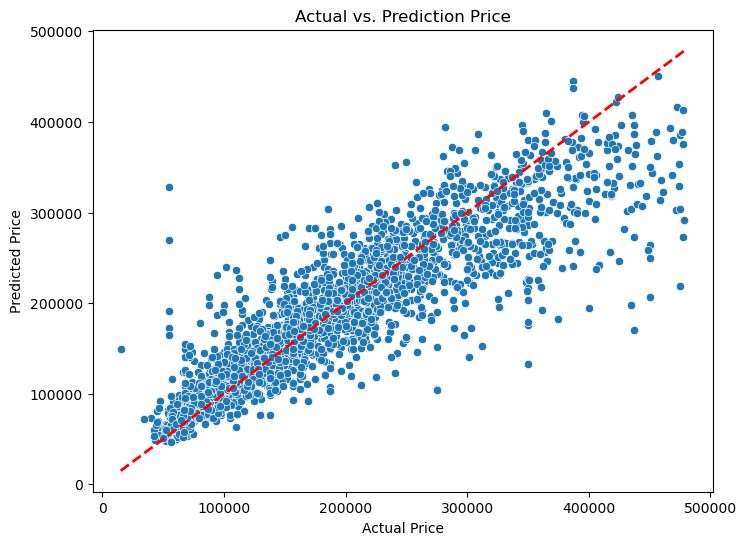

In [64]:
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');
# plotting the regression line
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)

Berdasarkan analisis terhadap metrik evaluasi model, terutama Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan Mean Absolute Percentage Error (MAPE), kita dapat menyimpulkan beberapa hal penting:

- RMSE dan MAE yang Besar: Meskipun RMSE dan MAE cukup besar, hal ini tidak menjadi masalah signifikan. Hal ini dapat diterima mengingat variabel target 'Median_House_Value' memiliki rentang nilai yang besar antara 40000-500000. Dengan demikian, besarnya nilai-nilai ini mungkin sesuai dengan skala keseluruhan masalah prediksi harga rumah.
- MAPE yang Rendah: MAPE yang rendah sebesar 0.17 (17%) merupakan indikasi baik bahwa model memiliki tingkat akurasi yang tinggi dalam memprediksi harga rumah. MAPE yang rendah menggambarkan seberapa baik model dapat memperkirakan nilai aktual dalam persentase kesalahan yang kecil.
- Pola Garis Lurus dalam Plot Nilai Prediksi dan Nilai Aktual: Adanya pola garis lurus dalam plot antara nilai prediksi dan nilai aktual menunjukkan bahwa model memiliki kemampuan yang baik dalam menyesuaikan diri dengan pola data. Hal ini mengindikasikan bahwa model dapat secara konsisten memprediksi harga rumah dengan tingkat kesalahan yang seragam.

Dengan demikian, kesimpulan secara keseluruhan adalah bahwa meskipun RMSE dan MAE cukup besar, model tersebut tetap dapat dianggap baik karena MAPE yang rendah dan kemampuannya dalam menghasilkan prediksi yang sesuai dengan pola data yang ada. Dengan catatan penting bahwa interpretasi nilai-nilai tersebut juga harus mempertimbangkan skala dan karakteristik khusus dari masalah prediksi harga rumah yang dihadapi.

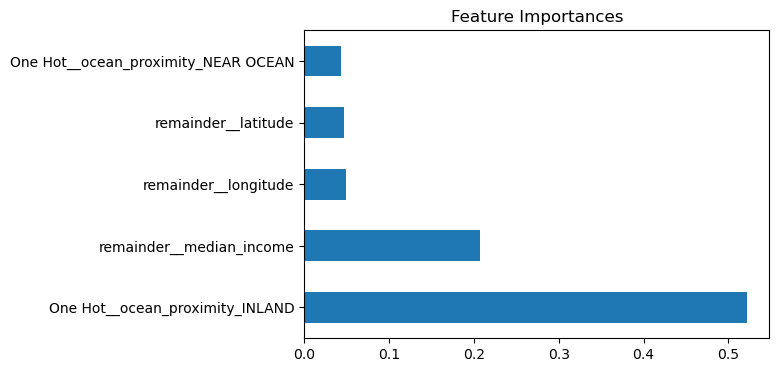

In [52]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
plt.figure(figsize=(6, 4))
feature_imp.plot(kind='barh', title='Feature Importances');

Feature importance mengukur sejauh mana setiap fitur (variabel) berkontribusi terhadap hasil prediksi dari model. Dalam konteks prediksi harga rumah, feature importance dapat memberikan wawasan tentang variabel mana yang paling memengaruhi prediksi. Berikut adalah penjelasan mengenai lima fitur terbesar yang mempengaruhi prediksi harga rumah, berdasarkan urutan feature importance:

- Ocean Proximity: Inland. Fitur ini menunjukkan apakah suatu properti berlokasi di daerah pedalaman atau bukan. Kemungkinan besar, properti di daerah pedalaman memiliki karakteristik tertentu yang memengaruhi harga rumah. Mungkin ini terkait dengan aksesibilitas, fasilitas umum, atau keamanan. Model menempatkan tingkat penting pada fitur ini, menunjukkan bahwa lokasi geografis dalam konteks "inland" memiliki dampak signifikan pada prediksi harga rumah.
- Median Income. Tingkat pendapatan ini dapat menjadi indikator penting tentang kemampuan finansial potensial pembeli rumah di daerah tersebut. Semakin tinggi "Median Income," semakin besar kemungkinan bahwa pembeli memiliki kapasitas finansial untuk membayar harga rumah yang lebih tinggi. (Hal ini juga tercermin dari hasil korelasi yang sebelumnya dilihat pada tahap EDA bahwa fitur ini memiliki korelasi positif yang tinggi dengan harga rumah)
- Longitude. Longitude mencerminkan letak geografis suatu properti di sepanjang garis bujur. Terkadang, lokasi geografis yang spesifik dapat memengaruhi harga rumah, terutama jika suatu daerah memiliki daya tarik khusus atau keunikan tertentu. Tingkat penting yang tinggi pada fitur ini menunjukkan bahwa model menganggap letak geografis sebagai faktor signifikan dalam memprediksi harga rumah.
- Latitude. Latitude mencerminkan letak geografis suatu properti di sepanjang garis lintang. Faktor ini juga dapat memengaruhi harga rumah, terutama jika suatu daerah memiliki iklim atau lingkungan geografis tertentu yang diinginkan oleh pembeli. Tingkat penting yang tinggi menunjukkan bahwa latitude memiliki dampak signifikan terhadap prediksi harga rumah.
- Ocean Proximity: Near Ocean. Fitur ini menunjukkan apakah suatu properti berdekatan dengan laut. Properti yang dekat dengan laut biasanya memiliki daya tarik tambahan, seperti pemandangan yang indah atau akses mudah ke pantai. Tingkat penting yang tinggi pada fitur ini menandakan bahwa kedekatan dengan laut dianggap sebagai faktor penting dalam menentukan harga rumah.


Dengan memahami feature importance ini, pemangku kepentingan dapat lebih memahami faktor-faktor yang paling berperan dalam prediksi harga rumah dan membuat keputusan yang lebih informasional terkait dengan pembelian atau investasi properti.


**Conclusion**

Evaluasi Model:
- Meskipun RMSE dan MAE model cukup besar, hal ini dapat diterima mengingat rentang nilai target 'Median_House_Value' yang besar (antara 40000-500000). Besarnya nilai-nilai tersebut sesuai dengan skala keseluruhan masalah prediksi harga rumah.
- MAPE yang rendah sebesar 17% menunjukkan bahwa model memiliki tingkat akurasi yang tinggi dalam memprediksi harga rumah. Model mampu memperkirakan nilai aktual dengan kesalahan yang kecil dalam persentase.

Pola Garis Lurus dalam Plot Nilai Prediksi dan Nilai Aktual:
- Adanya pola garis lurus dalam plot antara nilai prediksi dan nilai aktual menunjukkan bahwa model memiliki kemampuan yang baik dalam menyesuaikan diri dengan pola data. Ini mengindikasikan bahwa model secara konsisten dapat memprediksi harga rumah dengan tingkat kesalahan yang seragam.

Feature Importance:
- Lima fitur terbesar yang mempengaruhi prediksi harga rumah adalah 'Ocean Proximity: Inland', 'Median Income', 'Longitude', 'Latitude', dan 'Ocean Proximity: Near Ocean'.
- 'Median Income' memiliki tingkat penting tinggi, menunjukkan bahwa pendapatan tengah rumah tangga di suatu daerah adalah faktor kunci dalam memprediksi harga rumah. Semakin tinggi pendapatan, semakin besar kemungkinan harga rumah lebih tinggi.

Kesimpulan:
- Meskipun model memiliki RMSE dan MAE yang cukup besar, tingkat akurasi tinggi (rendahnya MAPE) dan kemampuan model untuk menyesuaikan diri dengan pola data memberikan keyakinan bahwa model tersebut efektif dalam memprediksi harga rumah.
- Faktor-faktor seperti lokasi geografis ('Longitude' dan 'Latitude') dan kedekatan dengan laut ('Ocean Proximity: Near Ocean') juga memiliki dampak signifikan.
- Kesimpulan keseluruhan adalah bahwa model dapat dianggap baik dalam memprediksi harga rumah, dengan perhatian khusus pada pentingnya 'Median Income' sebagai faktor utama yang mempengaruhi harga properti.

**Recommendations**

1. Penambahan fitur data dapat menjadi langkah yang signifikan untuk meningkatkan performa model prediksi harga rumah. Berikut adalah beberapa ide penambahan fitur yang dapat dipertimbangkan:
    - Rasio Kamar Tidur terhadap Jumlah Kamar: Menambahkan fitur yang mencerminkan rasio kamar tidur terhadap jumlah total kamar bisa memberikan wawasan tentang seberapa besar rasio ruang tidur terhadap ruang umum. Ini dapat memberikan informasi tambahan tentang tata letak dan proporsi rumah.
     - Luas Bangunan per Luas Tanah: Menambahkan fitur yang mencerminkan rasio luas bangunan terhadap luas tanah dapat memberikan informasi tentang sejauh mana tanah digunakan dan memungkinkan model memperhitungkan efisiensi penggunaan lahan.
     - Fasilitas Umum di Sekitar: Menambahkan fitur yang mencantumkan jarak ke fasilitas umum seperti sekolah, pusat perbelanjaan, atau rumah sakit dapat memberikan gambaran tentang kepraktisan lokasi properti dan memengaruhi harga.
     - Pertumbuhan Ekonomi Daerah: Menyertakan indikator pertumbuhan ekonomi di daerah tersebut, seperti pembangunan baru atau proyek-proyek infrastruktur, dapat memberikan pemahaman tentang potensi kenaikan nilai properti di masa depan.
     - Pendekatan Jarak ke Pusat Kota: Menambahkan fitur yang mencerminkan jarak relatif ke pusat kota atau pusat bisnis dapat memberikan informasi tentang seberapa strategis lokasi properti.
     - Indeks Kualitas Hidup: Jika data tersedia, fitur yang mencerminkan indeks kualitas hidup di daerah tersebut dapat menjadi faktor penting dalam menentukan harga rumah.
     - Fitur Interaksi Antara Variabel: Eksplorasi fitur interaksi antara variabel-variabel utama, seperti produk atau rasio antara dua fitur, untuk melihat apakah ada hubungan yang lebih kompleks yang dapat ditemukan.
2. Menyelidiki prediksi dengan nilai error yang signifikan, kita dapat mengkategorikan error tersebut ke dalam dua grup, yaitu overestimation (penilaian terlalu tinggi) dan underestimation (penilaian terlalu rendah). Kita akan memilih 5% prediksi dengan error terbesar dari masing-masing grup untuk dianalisis lebih lanjut. Sementara itu, 90% prediksi dengan error mendekati nilai rata-rata akan membentuk grup mayoritas. Langkah selanjutnya adalah mengevaluasi hubungan antara error dan setiap variabel independen. Analisis ini akan memberikan wawasan tentang variabel mana dan aspek apa yang mempengaruhi model menghasilkan error tinggi. Dengan pemahaman ini, dapat dilakukan pelatihan ulang dengan penerapan teknik feature engineering yang lebih baik untuk meningkatkan kinerja model.
3. Untuk meningkatkan jumlah data, bisa dilakukan pengumpulan data tambahan. Jika ingin mengevaluasi model yang lebih kompleks, misalnya menggunakan recursive neural networks (RNN), tetapi perlu diingat bahwa jika jumlah data dan fitur tetap seperti dataset saat ini, perubahan mungkin tidak signifikan.